# Exploratory Data Analysis (EDA) for Titanic Survival Prediction
- In this notebook, I performed an in-depth exploratory data analysis on the Titanic dataset. The analysis includes investigating missing values, feature distributions, relationships between features, and their impact on survival. Key insights gained here will guide the feature engineering and model-building phases.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')

### Data Preparation for EDA
- Split the training data into features (`x_train`) and target (`y_train`).
- Combined training and test datasets (`x_data`, `y_data`) for unified analysis.
- Merged features and target into a single dataset (`train_test_data`) for exploratory data analysis.


In [53]:
y_train = train_data['Survived']
x_train = train_data.drop(columns='Survived')

y_test = submission_data['Survived']
x_test = test_data

In [54]:
x_data = pd.concat([x_train, x_test], axis=0, ignore_index=True)
y_data = pd.concat([y_train, y_test], axis=0, ignore_index=True)

train_test_data = pd.concat([x_data, y_data], axis=1)

In [55]:
train_data.shape, test_data.shape, train_test_data.shape, 891+418

((891, 12), (418, 11), (1309, 12), 1309)

In [56]:
train_test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [57]:
train_test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.377387
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.484918
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


### Survival Analysis for Categorical Features
- Plotted stacked bar charts to compare survival and non-survival counts across categorical features (`Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`).
- Visualized survival distribution to identify trends in the data.


In [58]:
def plot_survival_counts(feature):
    # Group by the specified feature and survival columns and count the occurrences
    survival_counts = train_test_data.groupby([feature, 'Survived']).size().unstack(fill_value=0)

    survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])

    plt.title(f'Survival and Non-Survival Counts by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(['Non-Survived', 'Survived'], title='Survival Status', loc='upper left')
    plt.show()


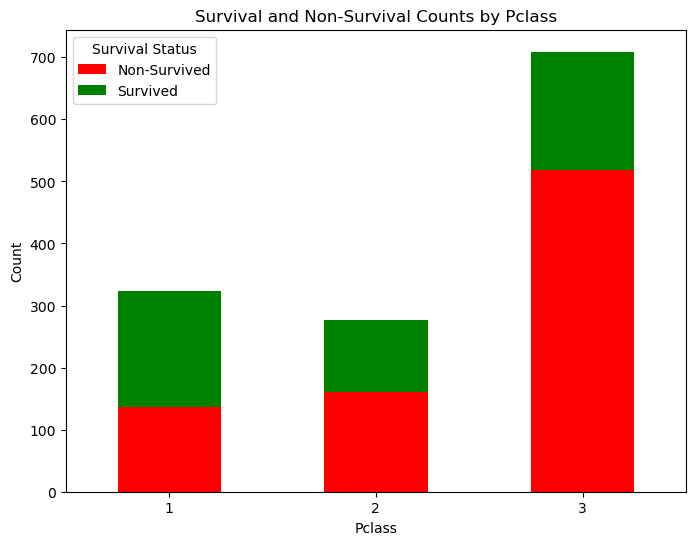

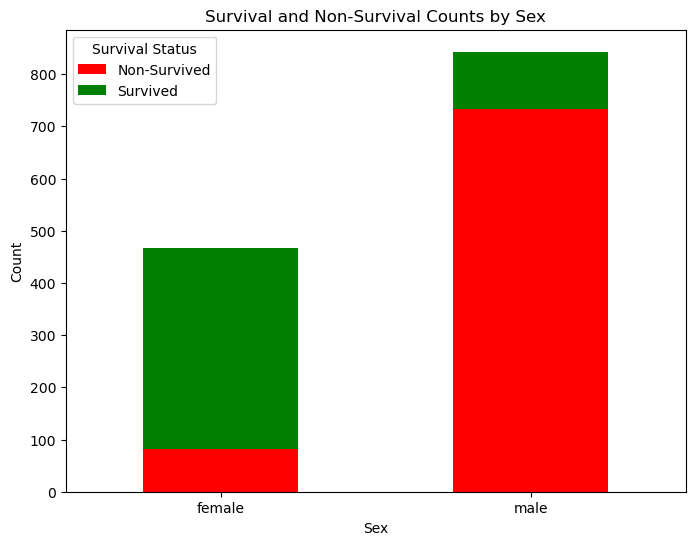

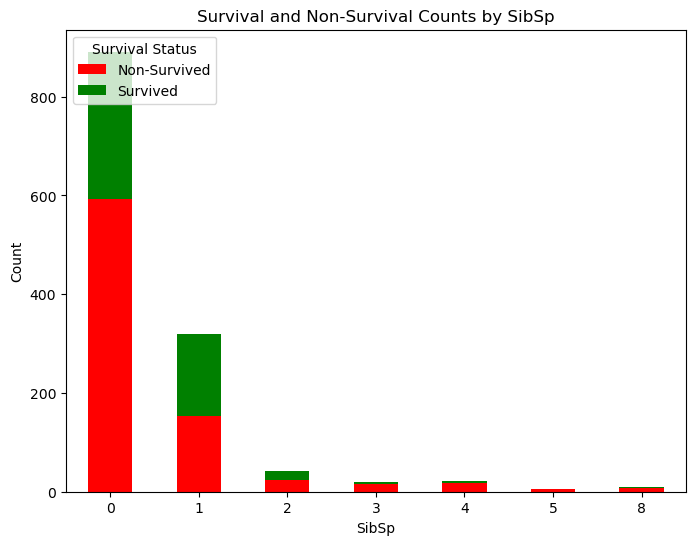

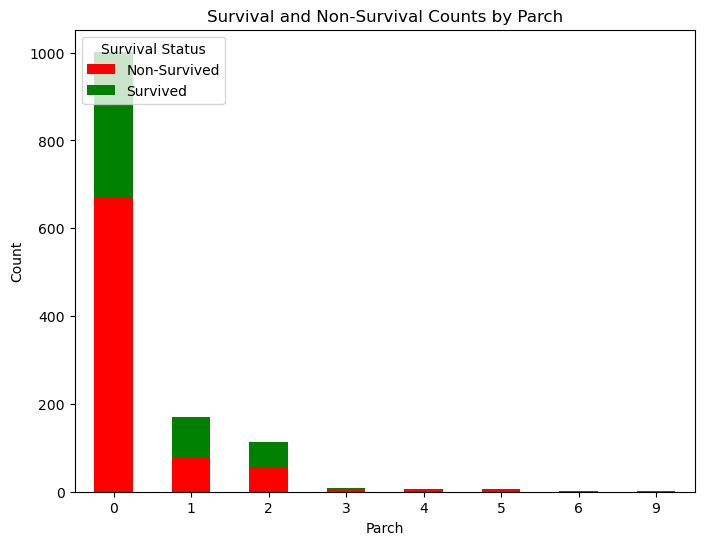

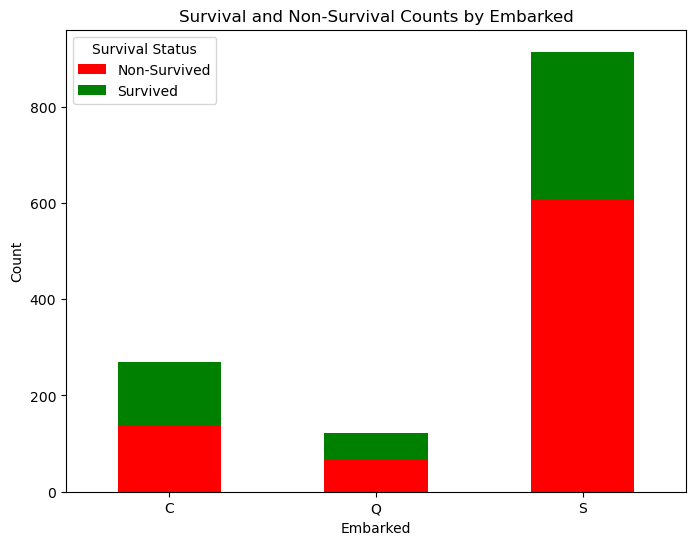

In [59]:
catagorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in catagorical_features:
    plot_survival_counts(feature=feature)


In [60]:
train_test_data['FamilySize'] = train_test_data['SibSp'] + train_test_data['Parch'] + 1

- Created a new feature `FamilySize` by combining `SibSp` and `Parch` with 1 (self).
- Analyzed survival distribution based on family size using a stacked bar chart.

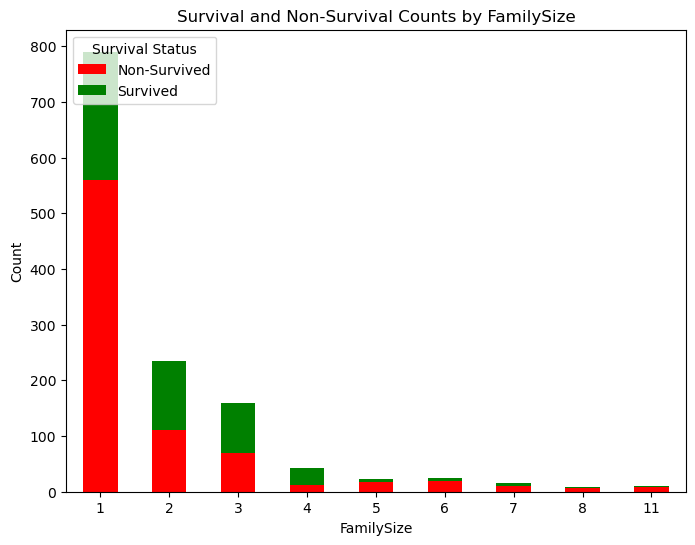

In [61]:
plot_survival_counts('FamilySize')

In [62]:
train_test_data['Title'] = train_test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

- Extracted titles from the `Name` column to create a new feature `Title`.
- Visualized survival distribution for different titles using a stacked bar chart.

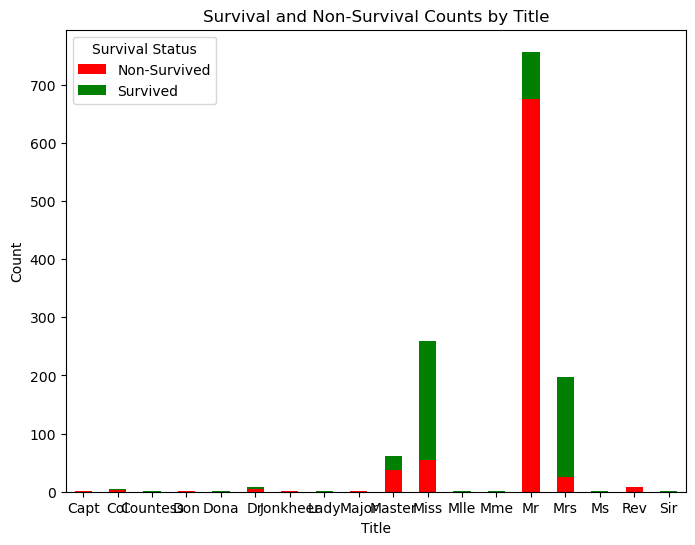

In [63]:
plot_survival_counts('Title')

In [64]:
train_test_data['HasCabin'] = train_test_data['Cabin'].notna().astype(int)

- Created a binary feature `HasCabin` indicating whether a passenger has cabin information (`1`) or not (`0`).

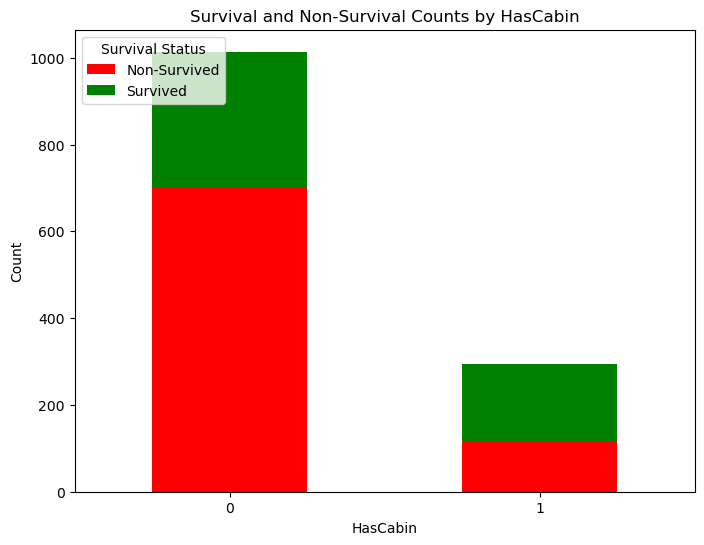

In [65]:
plot_survival_counts('HasCabin')

### Comparing Survival Across Multiple Features
- Compared survival and non-survival counts for combinations of `Pclass` and `Sex`, `Pclass` and `Embarked`, and `Embarked` and `Sex` using stacked bar charts.


In [66]:
def compare_survival_counts(feature1, feature2):
    # Group by the specified features and survival column and count the occurrences
    survival_counts = train_test_data.groupby([feature1, feature2, 'Survived']).size().unstack(fill_value=0)

    # Plotting
    survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])

    plt.title(f'Survival and Non-Survival Counts by {feature1} and {feature2}')
    plt.xlabel(f'{feature1} and {feature2}')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(['Non-Survived', 'Survived'], title='Survival Status', loc='upper left')
    plt.tight_layout()
    plt.show()


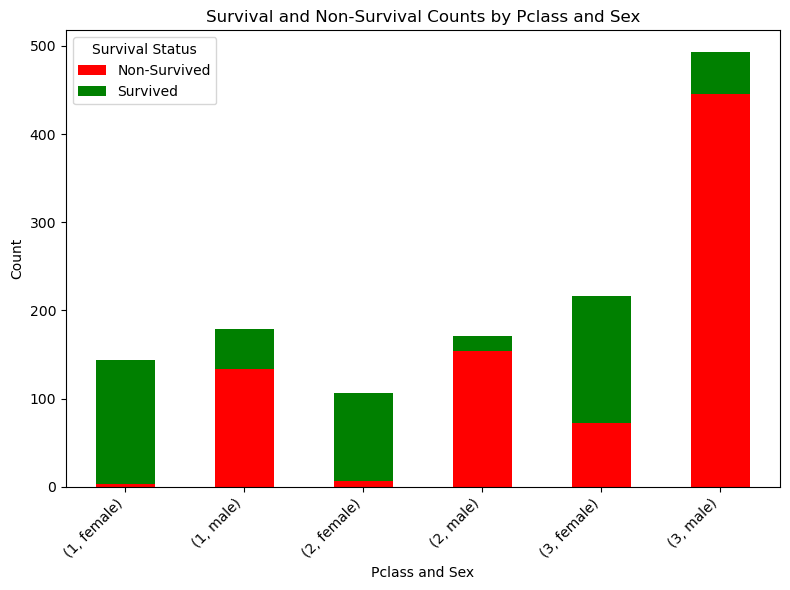

In [67]:
compare_survival_counts('Pclass', 'Sex')

- Combined `Pclass` and `Sex` to create a new feature `ClassCategory` in the feature engineerig part.

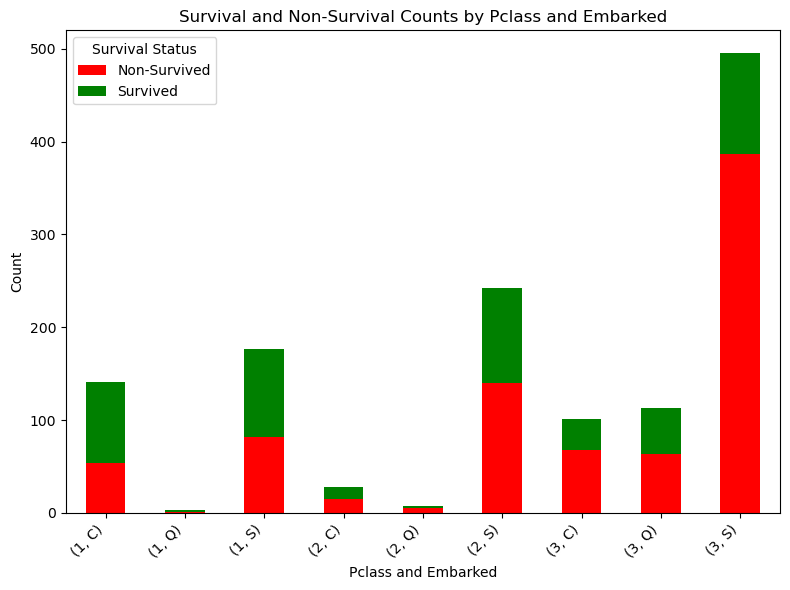

In [68]:
compare_survival_counts('Pclass', 'Embarked')

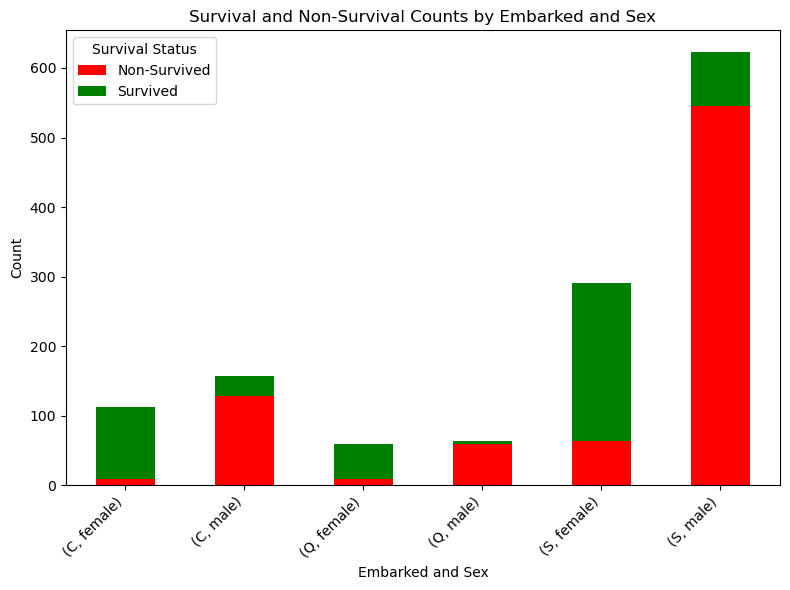

In [69]:
compare_survival_counts('Embarked', 'Sex')

### Analyzing Continuous Features
- Plotted the distribution and boxplots for continuous features (`Age` and `Fare`) to explore their relationship with survival:
  - Histograms with survival distinction to visualize frequency distributions.
  - Boxplots to highlight differences in central tendency and variability by survival status.


In [70]:
def plot_continuous_feature(feature):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram with Survival distinction
    sns.histplot(data=train_test_data, x=feature, hue='Survived', kde=True, ax=axes[0], multiple='stack')
    axes[0].set_title(f'Distribution of {feature} by Survival')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    # Boxplot with Survival distinction
    sns.boxplot(data=train_test_data, x='Survived', y=feature, ax=axes[1])
    axes[1].set_title(f'{feature} Boxplot by Survival')
    axes[1].set_xlabel('Survived')
    axes[1].set_ylabel(feature)

    plt.tight_layout()
    plt.show()


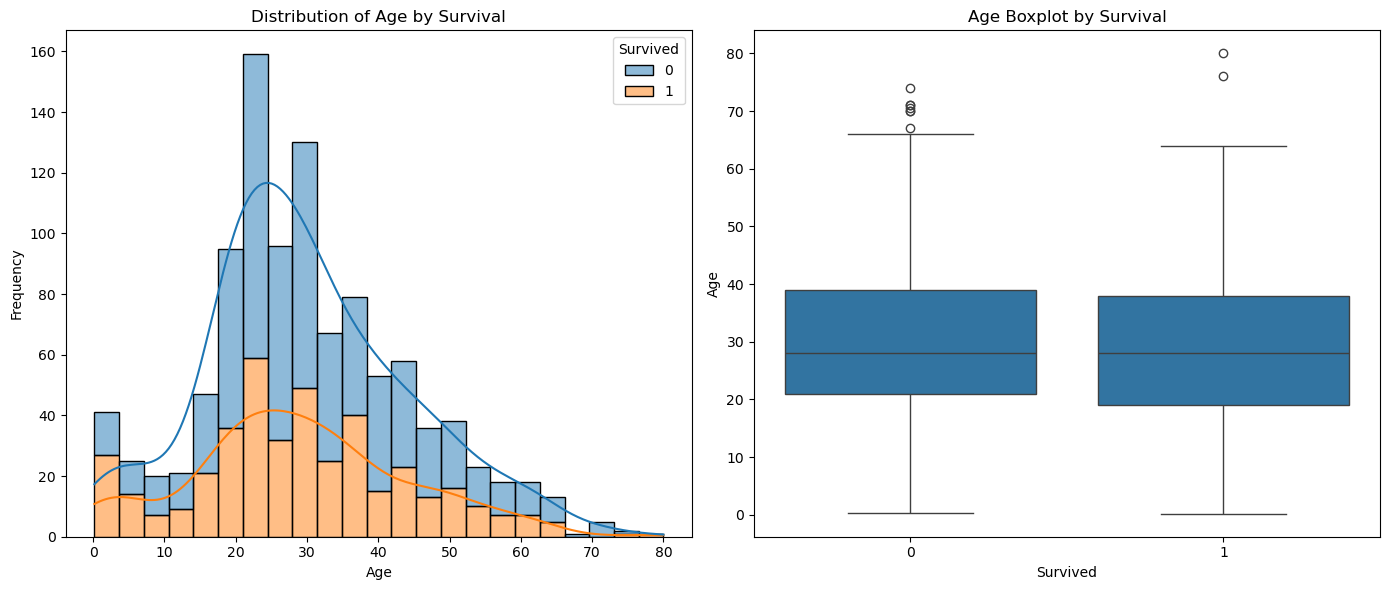

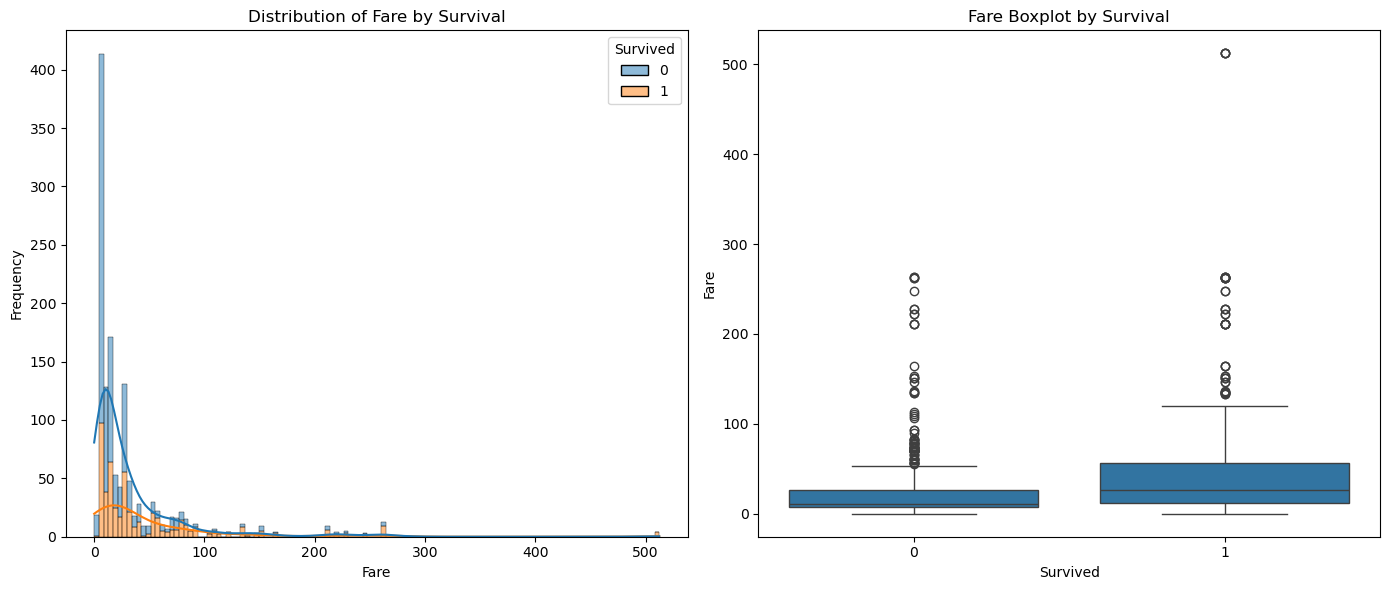

In [71]:
continuous_features = ['Age', 'Fare']

for feature in continuous_features:
    plot_continuous_feature(feature=feature)

In [72]:
for feature in continuous_features:
    skew = train_test_data[feature].skew()
    print(f"Skewness of {feature}: {skew:.2f}")

Skewness of Age: 0.41
Skewness of Fare: 4.37


- `Age`: Skewness is 0.41, indicating a nearly symmetric distribution.
- `Fare`: Skewness is 4.37, indicating a highly right-skewed distribution.

### Identifying Features with Missing Values
- Implemented a function to find features with missing values, displaying the count and percentage of missing data for each feature.


In [73]:
def find_nan_features(data):
    nan_counts = data.isna().sum()
    nan_features = nan_counts[nan_counts > 0]
    nan_percentages = (nan_features / len(data)) * 100
    
    for feature, count in nan_features.items():
        print(f"{feature} : {count}, : {nan_percentages[feature]:.2f}%")


In [74]:
find_nan_features(train_test_data)

Age : 263, : 20.09%
Fare : 1, : 0.08%
Cabin : 1014, : 77.46%
Embarked : 2, : 0.15%
